In [25]:
from PIL import Image
import glob, os

for infile in glob.glob("train/*.jpg"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    #im.resize((128,128))
    im.thumbnail((128,128))
    name = file[6:]
    im.save("train_resized_thumb_jpg/" + name + "_new.jpg", "JPEG")
    


In [27]:
for infile in glob.glob("test1/*.jpg"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    #im.resize((128,128))
    im.thumbnail((128,128))
    name = file[6:]
    im.save("test_resized/" + name + "_new.jpg", "JPEG")

Ресайз закончит

In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import  np_utils
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


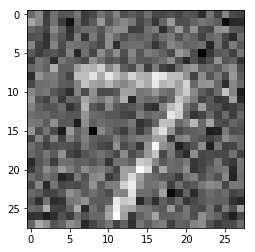

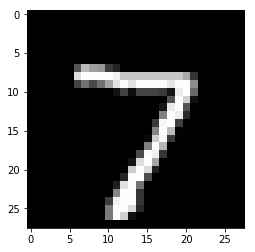

Epoch 1
Epoch 1/1
60000/60000 [==============================] - 13s 210us/step - loss: 0.0840


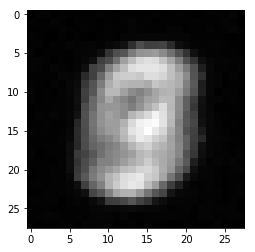

Epoch 2
Epoch 1/1
60000/60000 [==============================] - 9s 150us/step - loss: 0.0665


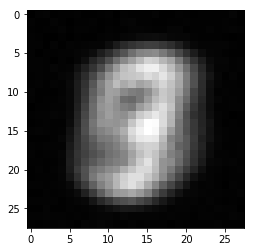

Epoch 3
Epoch 1/1
60000/60000 [==============================] - 11s 177us/step - loss: 0.0606


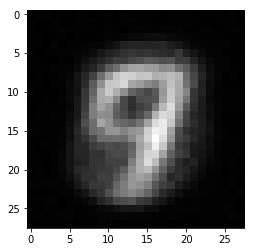

Epoch 4
Epoch 1/1
60000/60000 [==============================] - 11s 176us/step - loss: 0.0533


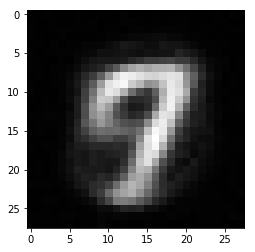

Epoch 5
Epoch 1/1
60000/60000 [==============================] - 11s 190us/step - loss: 0.0478


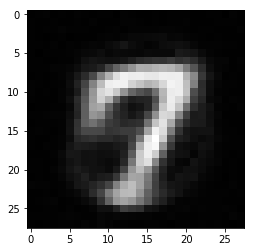

Epoch 6
Epoch 1/1
60000/60000 [==============================] - 11s 176us/step - loss: 0.0439


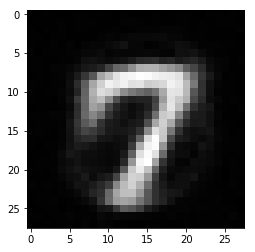

Epoch 7
Epoch 1/1
60000/60000 [==============================] - 10s 172us/step - loss: 0.0409


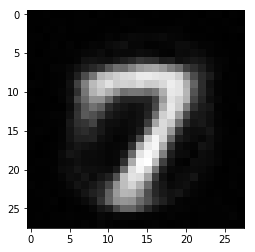

Epoch 8
Epoch 1/1
60000/60000 [==============================] - 10s 165us/step - loss: 0.0382


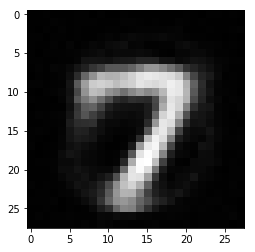

Epoch 9
Epoch 1/1
60000/60000 [==============================] - 10s 163us/step - loss: 0.0358


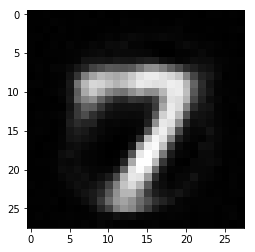

Epoch 10
Epoch 1/1
60000/60000 [==============================] - 10s 166us/step - loss: 0.0337


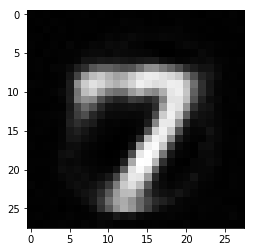

Epoch 11
Epoch 1/1
60000/60000 [==============================] - 10s 160us/step - loss: 0.0319


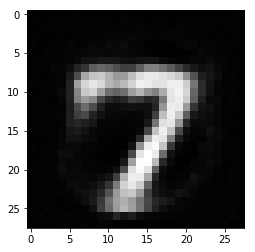

Epoch 12
Epoch 1/1
60000/60000 [==============================] - 10s 159us/step - loss: 0.0302


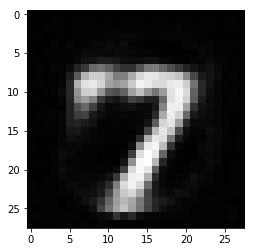

Epoch 13
Epoch 1/1
60000/60000 [==============================] - 10s 161us/step - loss: 0.0287


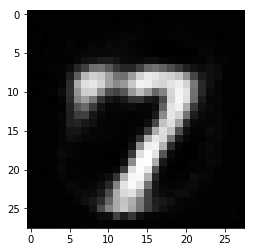

Epoch 14
Epoch 1/1
60000/60000 [==============================] - 10s 175us/step - loss: 0.0275


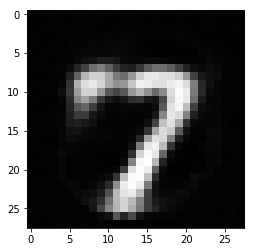

Epoch 15
Epoch 1/1
60000/60000 [==============================] - 10s 168us/step - loss: 0.0265


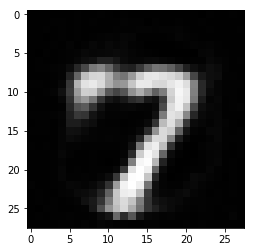

Epoch 16
Epoch 1/1
60000/60000 [==============================] - 10s 169us/step - loss: 0.0255


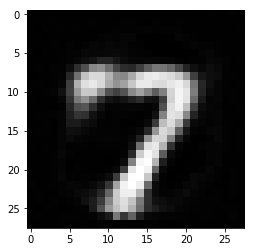

Epoch 17
Epoch 1/1
60000/60000 [==============================] - 10s 161us/step - loss: 0.0246


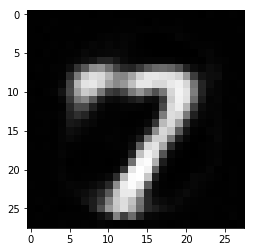

Epoch 18
Epoch 1/1
60000/60000 [==============================] - 10s 160us/step - loss: 0.0238


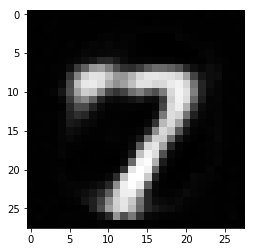

Epoch 19
Epoch 1/1
60000/60000 [==============================] - 11s 178us/step - loss: 0.0231


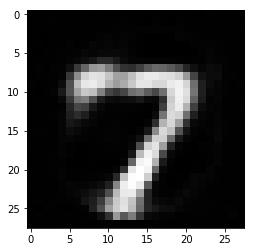

Epoch 20
Epoch 1/1
60000/60000 [==============================] - 10s 168us/step - loss: 0.0225


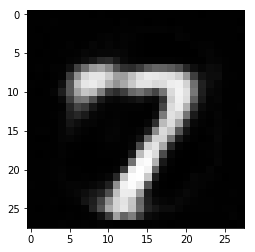

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

y_train = x_train.copy()
y_test = x_test.copy()

n_input = x_train.shape[1]
n_hidden_1 = 256
n_hidden_2 = 256
n_output = n_input
training_epochs = 20
batch_size = 1000
noise = 0.3

x_train = x_train + noise *  np.random.randn(*x_train.shape)
x_test = x_test + noise * np.random.randn(*x_test.shape)

plt.imshow(x_test[0].reshape((28,28)), cmap = 'gray')
plt.show()
plt.imshow(y_test[0].reshape((28,28)), cmap = 'gray')
plt.show()

model = Sequential()
model.add(Dense(n_hidden_1, input_shape=(n_input,)))
model.add(Dropout(rate = 0.2))
model.add(Activation('sigmoid'))

model.add(Dense(n_hidden_2))
model.add(Dropout(rate = 0.2))
model.add(Activation('sigmoid'))
          
model.add(Dense(n_output))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss = 'mean_squared_error')

for i in range(training_epochs):
    print("Epoch", i+1)
    model.fit(x_train, y_train, batch_size = batch_size, epochs = 1)
    y_pred = model.predict(x_test, batch_size=batch_size)
    plt.imshow(y_pred[0].reshape((28, 28)), cmap='gray')
    plt.show()#savefig

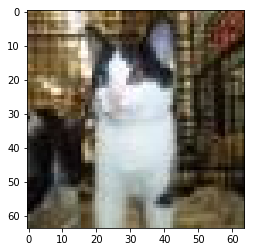

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


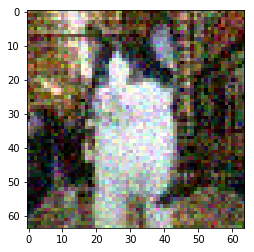

Epoch 1
Epoch 1/1
1000/1000 [==============================] - 86s 86ms/step - loss: 0.0665


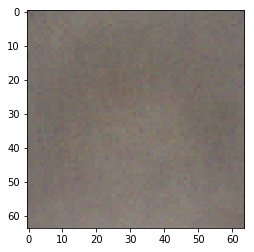

Epoch 2
Epoch 1/1
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0644


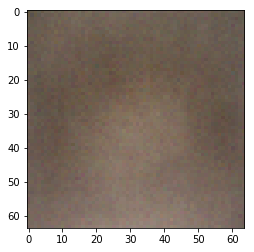

Epoch 3
Epoch 1/1
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0622


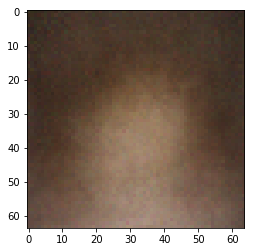

Epoch 4
Epoch 1/1
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0601


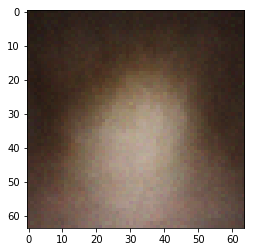

Epoch 5
Epoch 1/1
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0562


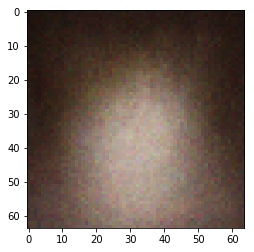

Epoch 6
Epoch 1/1
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0529


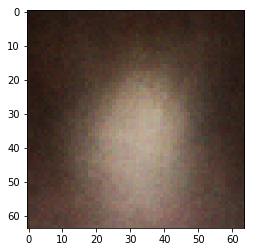

Epoch 7
Epoch 1/1
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0494


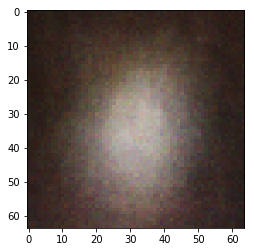

Epoch 8
Epoch 1/1
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0499


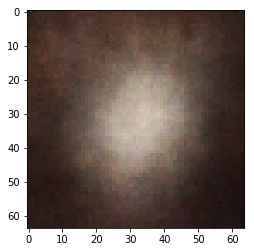

Epoch 9
Epoch 1/1
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0455


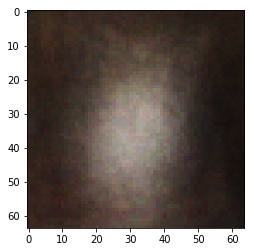

Epoch 10
Epoch 1/1
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0431


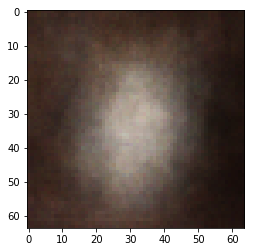

Epoch 11
Epoch 1/1
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0438


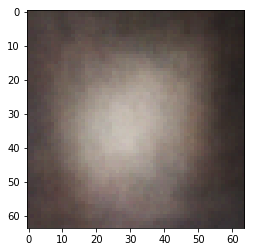

Epoch 12
Epoch 1/1
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0436


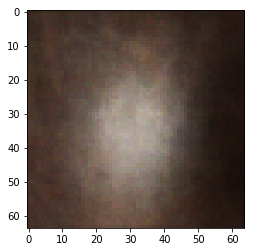

Epoch 13
Epoch 1/1
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0416


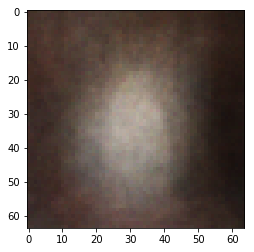

Epoch 14
Epoch 1/1
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0418


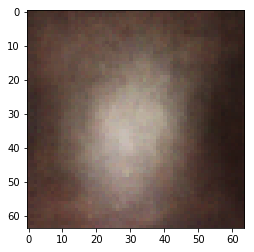

Epoch 15
Epoch 1/1
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0425


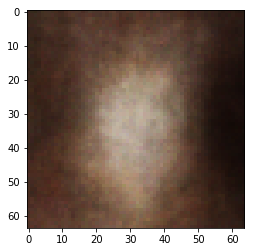

Epoch 16
Epoch 1/1
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0397


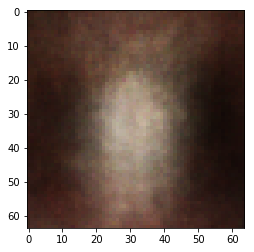

Epoch 17
Epoch 1/1
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0373


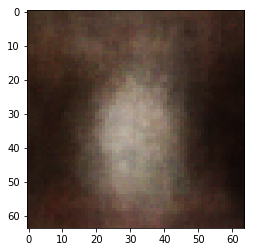

Epoch 18
Epoch 1/1
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0366


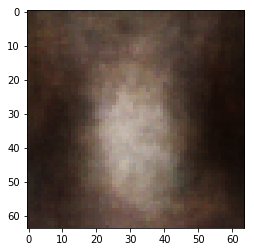

Epoch 19
Epoch 1/1
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0410


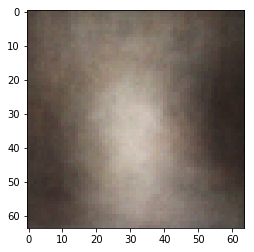

Epoch 20
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0398


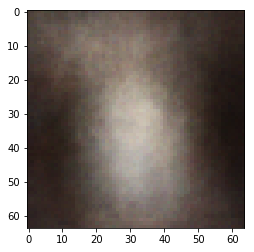

In [21]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

import os
import PIL.Image as Img

folder = 'train'
new_folder = 'cats'
px = 64
feat = px**2*3
for i in range(12500):
    name = '.'.join(['cat', str(i), 'jpg'])
    source = os.path.join(folder, name)
    dest = os.path.join(new_folder, name)
    img = Img.open(source)
    img = img.resize((px, px), Img.LANCZOS)
    img.save(dest)

source_input = (px, px, 3)
n_input = feat
n_hidden_1 = 2048
n_hidden_2 = 2048
n_output = n_input
training_epochs = 20
batch_size = 100
noise = 0.1

x = np.zeros((1100,) + source_input)
for i in range(1100):
    name = '.'.join(['cat', str(i), 'jpg'])
    dest = os.path.join(new_folder, name)
    x[i] = plt.imread(dest)

x_train, x_test = x[:1000], x[1000:]
x_train = x_train.reshape((-1, feat))
x_test = x_test.reshape((-1, feat))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = x_train.copy()
y_test = x_test.copy()

x_train = x_train + noise * np.random.randn(*x_train.shape)
x_test = x_test + noise * np.random.randn(*x_test.shape)

plt.imshow(y_test[0].reshape(source_input))
plt.show()
plt.imshow(x_test[0].reshape(source_input))
plt.show()

model = Sequential()
model.add(Dense(n_hidden_1, input_shape=(n_input,)))
model.add(Dropout(rate=0.02))
model.add(Activation('sigmoid'))

model.add(Dense(n_hidden_2))
model.add(Dropout(rate=0.02))
model.add(Activation('sigmoid'))

model.add(Dense(n_output))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')

for i in range(training_epochs):
    print("Epoch", i+1)
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1)
    y_pred = model.predict(x_test, batch_size=batch_size)
    plt.imshow(y_pred[0].reshape(source_input))
    plt.show()


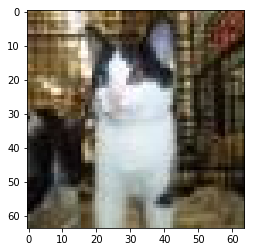

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


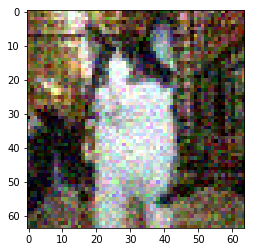

Epoch 1
Epoch 1/1
1000/1000 [==============================] - 54s 54ms/step - loss: 0.0668


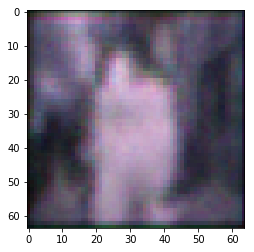

Epoch 2
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


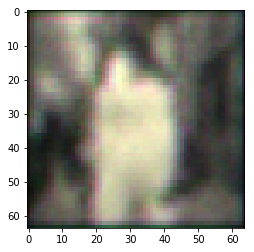

Epoch 3
Epoch 1/1
1000/1000 [==============================] - 34s 34ms/step - loss: 0.0181


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


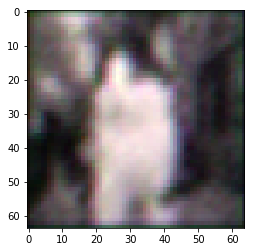

Epoch 4
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0139


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


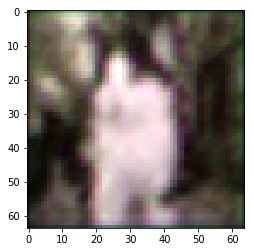

Epoch 5
Epoch 1/1
1000/1000 [==============================] - 36s 36ms/step - loss: 0.0111


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


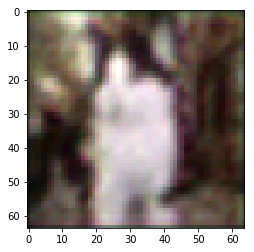

Epoch 6
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0087


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


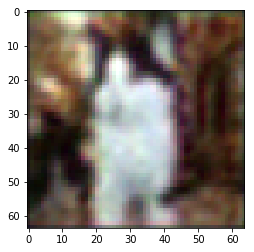

Epoch 7
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0072


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


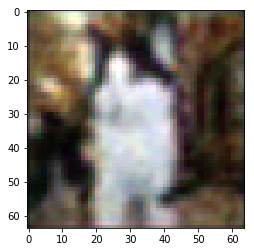

Epoch 8
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0063


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


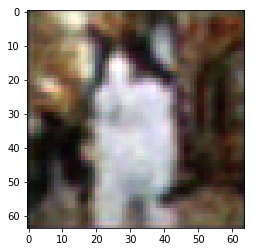

Epoch 9
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0058


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


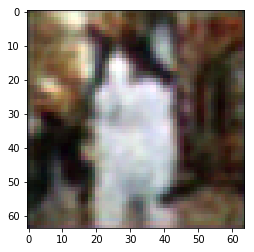

Epoch 10
Epoch 1/1
1000/1000 [==============================] - 35s 35ms/step - loss: 0.0054


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


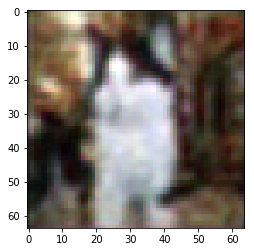

Epoch 11
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0051


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


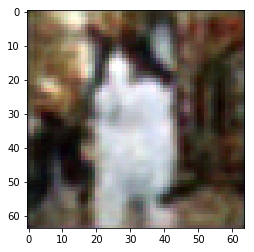

Epoch 12
Epoch 1/1
1000/1000 [==============================] - 59s 59ms/step - loss: 0.0049


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


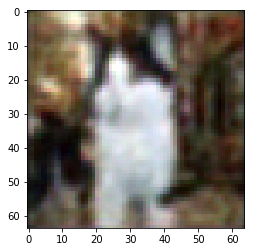

Epoch 13
Epoch 1/1
1000/1000 [==============================] - 45s 45ms/step - loss: 0.0047


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


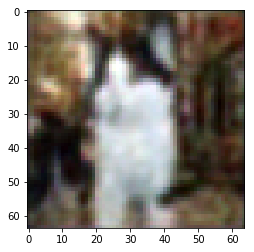

Epoch 14
Epoch 1/1
1000/1000 [==============================] - 34s 34ms/step - loss: 0.0045


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


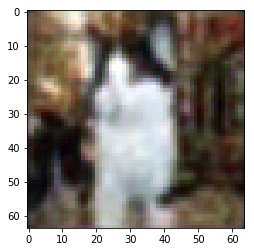

Epoch 15
Epoch 1/1
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0044


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


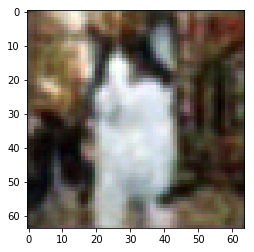

Epoch 16
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0042


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


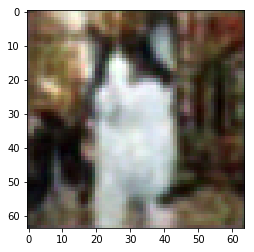

Epoch 17
Epoch 1/1
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0041


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


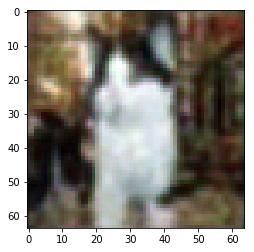

Epoch 18
Epoch 1/1
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0040


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


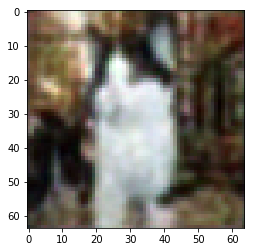

Epoch 19
Epoch 1/1
1000/1000 [==============================] - 34s 34ms/step - loss: 0.0039


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


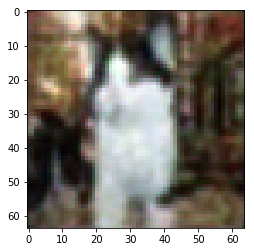

Epoch 20
Epoch 1/1
1000/1000 [==============================] - 34s 34ms/step - loss: 0.0038


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


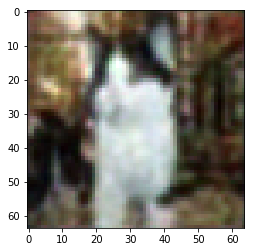

In [23]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

import os
import PIL.Image as Img

folder = 'train'
new_folder = 'cats'
px = 64
feat = px**2*3
for i in range(12500):
    name = '.'.join(['cat', str(i), 'jpg'])
    source = os.path.join(folder, name)
    dest = os.path.join(new_folder, name)
    img = Img.open(source)
    img = img.resize((px, px), Img.LANCZOS)
    img.save(dest)

source_input = (px, px, 3)
n_input = feat
n_hidden_1 = 2048
n_hidden_2 = 2048
n_output = n_input
training_epochs = 20
batch_size = 100
noise = 0.1

x = np.zeros((1100,) + source_input)
for i in range(1100):
    name = '.'.join(['cat', str(i), 'jpg'])
    dest = os.path.join(new_folder, name)
    x[i] = plt.imread(dest)

x_train, x_test = x[:1000], x[1000:]
#x_train = x_train.reshape((-1, feat))
#x_test = x_test.reshape((-1, feat))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = x_train.copy()
y_test = x_test.copy()

x_train = x_train + noise * np.random.randn(*x_train.shape)
x_test = x_test + noise * np.random.randn(*x_test.shape)

plt.imshow(y_test[0].reshape(source_input))
plt.show()
plt.imshow(x_test[0].reshape(source_input))
plt.show()

model = Sequential()
model.add(Conv2D(filters = 24, kernel_size = 3, padding = "same", activation = "relu", input_shape=source_input))
model.add(Dropout(rate=0.02))
model.add(MaxPooling2D(padding = "same"))

model.add(Conv2D(filters = 24, kernel_size = 3, padding = "same", activation = "relu"))
model.add(Dropout(rate=0.02))
model.add(UpSampling2D())
model.add(Conv2D(filters = 24, kernel_size = 3, padding = "same", activation = "relu"))
model.add(Conv2D(filters = 3, kernel_size = 3, padding = "same", activation = "relu"))

model.compile(optimizer='adam', loss='mean_squared_error')

for i in range(training_epochs):
    print("Epoch", i+1)
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1)
    y_pred = model.predict(x_test, batch_size=batch_size)
    plt.imshow(y_pred[0].reshape(source_input))
    plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

import os
import PIL.Image as Img

folder = 'train'
new_folder = 'cats'
px = 128
feat = px**2*3
for i in range(12500):
    name = '.'.join(['cat', str(i), 'jpg'])
    source = os.path.join(folder, name)
    dest = os.path.join(new_folder, name)
    img = Img.open(source)
    img = img.resize((px, px), Img.LANCZOS)
    img.save(dest)

source_input = (px, px, 3)
n_input = feat
n_hidden_1 = 2048
n_hidden_2 = 2048
n_output = n_input
training_epochs = 50
batch_size = 100
noise = 0.1

x = np.zeros((1100,) + source_input)
for i in range(1100):
    name = '.'.join(['cat', str(i), 'jpg'])
    dest = os.path.join(new_folder, name)
    x[i] = plt.imread(dest)

x_train, x_test = x[:1000], x[1000:]
#x_train = x_train.reshape((-1, feat))
#x_test = x_test.reshape((-1, feat))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = x_train.copy()
y_test = x_test.copy()

x_train = x_train + noise * np.random.randn(*x_train.shape)
x_test = x_test + noise * np.random.randn(*x_test.shape)

plt.imshow(y_test[0].reshape(source_input))
plt.show()
plt.imshow(x_test[0].reshape(source_input))
plt.show()

model = Sequential()
model.add(Conv2D(filters = 48, kernel_size = 3, padding = "same", activation = "relu", input_shape=source_input))
model.add(Dropout(rate=0.02))
model.add(MaxPooling2D(padding = "same"))

model.add(Conv2D(filters = 48, kernel_size = 3, padding = "same", activation = "relu"))
model.add(Dropout(rate=0.02))
model.add(UpSampling2D())
model.add(Conv2D(filters = 48, kernel_size = 3, padding = "same", activation = "relu"))
model.add(Conv2D(filters = 3, kernel_size = 3, padding = "same", activation = "relu"))

model.compile(optimizer='adam', loss='mean_squared_error')

for i in range(training_epochs):
    print("Epoch", i+1)
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1)
    y_pred = model.predict(x_test, batch_size=batch_size)
    plt.imshow(y_pred[0].reshape(source_input))
    plt.show()


Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 1 Axes>

Epoch 1
Epoch 1/1
 100/1000 [==>...........................] - ETA: 1:05:41 - loss: 0.2723